# Projet Supply Chain - Satisfaction des clients

**Groupe DS23 :**
- Margaux  ELISSALDE
- Yahya    HRIBACH
- Marine   MERLE
- Narcisse TCHAMANI

Notre projet porte sur l'analyse d'une supply chain et donc sur l'ensemble des étapes d'approvisionnement, du processus productif 
et de distribution de la marchandise.

En aval de ce processus, il peut être intéressant d'évaluer la satisfaction des clients : 
- les produits correspondent ils à leurs besoins ?
- si non : quels sont les motifs d'insatisfactions ?
- des retours sont ils faits aux commentaires des clients ? 
- quelles sont les améliorations pouvant être mises en place pour améliorer le processus? 

Notre restitution s'articule autour de quatre grands axes :\
1- Introduction, contexte projet \
2- Collecte de données, préprocessing et visualisation \
3- Modélisation et définition d'algorithmes \
4- Conclusion de la performance des modèles 

## 1. Introduction

### 1.1 Contexte du projet

Dans le groupe, seules Margaux et Marine travaillent - respectivement chez l'Oréal et Eiffage Construction.\
Narcisse et Yahya sont quant à eux étudiants - respectivement en xxxx.

Margaux \
L'Oréal est un groupe industriel français de produits cosmétiques qui possède plusieurs marques telles que l'Oréal, Garniel, Mixa ou encore Maybelline. 
Son objectif est de produire des cosmétiques dont les formules doivent être parfaitement adaptées aux besoins clients. 
Mon travail actuel consiste à définir ces formules (chimiques) en fonction des retours faits par le service marketing.
L'Oréal est devenu une entreprise 'Digital First' dont la transition digitale, bien avancée, a permis d’établir une relation privilégiée avec ses consommateurs, afin de répondre à leurs attentes et de créer de nouveaux produits et services.
Ce projet Datascientest s'inscrit donc dans la continuité de mon activité. 

Marine \
Eiffage est l'un des leaders européens du BTP et des concessions qui exerce ses activités au travers de 8 métiers suivants : construction, immobilier, aménagement, routes, génie civil, métal, concessions et énergie. 
La transition digitale est, dans le bâtiment, beaucoup moins avancée que dans d'autre domaine. A l'heure actuelle, Eiffage Construction recueille ses données, les structure.  
Sans que ces données soient chiffrées, la satisfaction clients en livraison de chantier ou encore l'adéquation entre le besoin et les offres immobilières sont malgré tout recherchés.
Ce projet Datascientest pourra donc se décliner dans mon entreprise sur ces thématiques bien précises.

### 1.2 Problématique 

L'analyse de données est une notion nouvelle pour l'ensemble du groupe. \
Aucun d'entre nous ne travaille dans ce domaine. Nous avons donc fait des recherches internet pour affiner les problématiques de performance d'une supply chain et de la satisfaction clients. \
De façon synthétique, les entreprises recherchent généralement à : 
> Pour évaluer la performance 'achats' : 
* dépasser les attentes de leurs clients afin de différencier leurs marques 
* réduire le coût moyen d’opération
* évaluer la fiabilité des fournisseurs 
* réduire le taux de litige et le taux de retards (gestion du lead time)
* identifier le taux d’achats par famille de produits\
> Pour évaluer la performance 'supply chain' :
* optimiser le taux de disponibilité / le taux de stocks
* optimiser le taux de remplissage par véhicule 
* réduire la durée moyenne d’opération 
* réduire le coût du transport sur les ventes 
* garantir un taux élévé de livraison dans les délais

Parmis ces données, toutes ne sont pas récupérables en libre service.
Nous essaierons donc d'obtenir celles accessibles sur internet. 


## 2. Collecte de données, préprocessing et visualisation

Les données que nous avons analysé ont été récupérées sur des sites libres d'accès, en ligne, en faisant du WebScrapping.

Dans un premier temps, nous avons récupéré des données de différents secteurs et notamment dans les domaines de :
* la cosmétique
* le vestimentaire
* l agroalimentaire
* le sport

Chacun a analysé ses données.\
Selon le secteur, les services clients répondent plus au moins aux consommateurs.
Nous avons donc décidé de nous concentrer sur le secteur de la cosmétique - secteur dans lequel les services clients répondent 
le plus et dans lequel travaille Margaux.

### 2.1 Collecte des données

Nous allons scrapper les avis clients, émis sur le site Truspilot, des entreprises : Sephora, Marionnaud, Nocibé et My Origins.

In [9]:
# Import des packages nécessaires

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from bs4 import BeautifulSoup as bs
import requests

#### a) Jeu de données scrappé sur le site Trustpilot - company Sephora

In [10]:
# Scrapping des données sephora

url_base = "https://fr.trustpilot.com/review/www.sephora.com"

company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav =[], [], [], [], [], [], [], [], [], []


for page_number in range(1, 19):
    url=f"{url_base}?page={page_number}"
    page=requests.get(url, verify=False)
    soup=bs(page.content, 'lxml')

    for donnees in soup.find_all('div', attrs = {'class' : "styles_reviewCardInner__EwDq2"}) :

        company.append('Sephora')

        personne=donnees.find('span', class_='typography_heading-xxs__QKBS8 typography_appearance-default__AAY17').text.strip()
        client.append(personne)

        avis=donnees.find('span', class_='typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l').text.strip()
        nb_avis_client.append(avis)

        date_cde=donnees.find('p', class_='typography_body-m__xgxZ_ typography_appearance-default__AAY17').text.strip()
        date_commande.append(date_cde[22:])

        #etoile=donnees.find('img') renvoie, à tort, des notes vides ne pouvant pas être converties en 'int'
        #notes.append(etoile['alt'])
        #nous utilisons alors le code suivant:

        extrac_notes=donnees.find('div', attrs={"star-rating_starRating__4rrcf star-rating_medium__iN6Ty"})
        nb_notes=extrac_notes.find_next('img')
        notes.append(nb_notes['src'])

        titre = donnees.find("h2", class_="typography_heading-s__f7029 typography_appearance-default__AAY17").text
        titre_commentaire.append(titre)

        comments = donnees.find('div', attrs={"styles_reviewContent__0Q2Tg"})
        comments_2 = comments.find_next('p').text
        commentaire.append(comments_2)

        date_com=donnees.find('div', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_datesWrapper__RCEKH"})
        com=date_com.find_next('time')
        date_commentaire.append(com['datetime'])

        rep_sav = donnees.find(class_ = "typography_body-m__xgxZ_ typography_appearance-default__AAY17 styles_message__shHhX")
        if rep_sav == None:
            reponse_sav.append(np.nan)
        else:
            reponse_sav.append(rep_sav.getText())

        date_rep_sav=donnees.find('time', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_replyDate__Iem0_"})
        if date_rep_sav is not None:
            date_rep_sav=date_rep_sav['datetime']
            date_reponse_sav.append(date_rep_sav)
        else:
            date_reponse_sav.append(np.nan)

C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedoc

C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedoc

In [11]:
# Création du dataframe df_Sephora

df_sephora = pd.DataFrame(list(zip(company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav)),
               columns =['company', 'client', 'nb_avis_client', 'date_commande', 'notes', 'titre_commentaire', 'commentaire',  'date_commentaire',  'reponse_sav', 'date_reponse_sav'])

df_sephora['notes'] = df_sephora['notes'].str.replace('https://cdn.trustpilot.net/brand-assets/4.1.0/stars/stars-', '')
df_sephora['notes'] = df_sephora['notes'].str.replace('.svg', '')

display(df_sephora.head())

,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav
0,Sephora,Suzy B,1 avis,25 mai 2023,5,ACCUEIL AGREABLE ET CHALEUREUX,J'ai été merveilleusement accueillie et consei...,2023-05-26T22:28:26.000Z,NaN,NaN
1,Sephora,valerie Tixier,9 avis,06 décembre 2022,1,Colis non encore reçu après deux…,Colis non encore reçu après deux semaines - il...,2022-12-07T23:23:02.000Z,NaN,NaN
2,Sephora,Claire Desmedt,3 avis,30 mai 2022,1,Toujours pas de remboursement après un…,Toujours pas de remboursement après un mois et...,2022-05-30T13:56:52.000Z,NaN,NaN
3,Sephora,Nam Nam,1 avis,20 août 2020,1,Fuyez!,"Mais plus jamais, jamais , jamais!!! Sensé ouv...",2020-08-20T08:34:01.000Z,NaN,NaN
4,Sephora,Stephane Jeanmart,2 avis,29 novembre 2022,1,J'ai commandé un parfum chez Séphora,J'ai commandé un parfum chez Séphora le mois d...,2022-12-01T02:51:12.000Z,NaN,NaN


#### b)  Jeu de données scrappé sur le site Trustpilot - company Marionnaud

In [12]:
# Scrapping des données Marionnaud

url_base = "https://fr.trustpilot.com/review/www.marionnaud.com"

company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav =[], [], [], [], [], [], [], [], [], []


for page_number in range(1, 19):
    url=f"{url_base}?page={page_number}"
    page=requests.get(url, verify=False)
    soup=bs(page.content, 'lxml')

    for donnees in soup.find_all('div', attrs = {'class' : "styles_reviewCardInner__EwDq2"}) :

        company.append('Marionnaud')

        personne=donnees.find('span', class_='typography_heading-xxs__QKBS8 typography_appearance-default__AAY17').text.strip()
        client.append(personne)

        avis=donnees.find('span', class_='typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l').text.strip()
        nb_avis_client.append(avis)

        date_cde=donnees.find('p', class_='typography_body-m__xgxZ_ typography_appearance-default__AAY17').text.strip()
        date_commande.append(date_cde[22:])

        extrac_notes=donnees.find('div', attrs={"star-rating_starRating__4rrcf star-rating_medium__iN6Ty"})
        nb_notes=extrac_notes.find_next('img')
        notes.append(nb_notes['src'])

        titre = donnees.find("h2", class_="typography_heading-s__f7029 typography_appearance-default__AAY17").text
        titre_commentaire.append(titre)

        comments = donnees.find('div', attrs={"styles_reviewContent__0Q2Tg"})
        comments_2 = comments.find_next('p').text
        commentaire.append(comments_2)

        date_com=donnees.find('div', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_datesWrapper__RCEKH"})
        com=date_com.find_next('time')
        date_commentaire.append(com['datetime'])

        rep_sav = donnees.find(class_ = "typography_body-m__xgxZ_ typography_appearance-default__AAY17 styles_message__shHhX")
        if rep_sav == None:
            reponse_sav.append(np.nan)
        else:
            reponse_sav.append(rep_sav.getText())

        date_rep_sav=donnees.find('time', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_replyDate__Iem0_"})
        if date_rep_sav is not None:
            date_rep_sav=date_rep_sav['datetime']
            date_reponse_sav.append(date_rep_sav)
        else:
            date_reponse_sav.append(np.nan)
            

C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedoc

In [13]:
# Création du dataframe df_Marionnaud

df_Marionnaud = pd.DataFrame(list(zip(company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav)),
               columns =['company', 'client', 'nb_avis_client', 'date_commande', 'notes', 'titre_commentaire', 'commentaire',  'date_commentaire',  'reponse_sav', 'date_reponse_sav'])

df_Marionnaud['notes'] = df_Marionnaud['notes'].str.replace('https://cdn.trustpilot.net/brand-assets/4.1.0/stars/stars-', '')
df_Marionnaud['notes'] = df_Marionnaud['notes'].str.replace('.svg', '')

display(df_Marionnaud.head())

,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav
0,Marionnaud,Khattab Jebri,4 avis,19 juillet 2023,1,J’ai passé trois fois une commande qui…,J’ai passé trois fois une commande qui a été v...,2023-07-21T16:56:56.000Z,NaN,NaN
1,Marionnaud,Rachid GUELAI,1 avis,07 juillet 2023,1,Commande internet,"Bonjour, J’ai effectué une commande via le sit...",2023-07-19T12:35:28.000Z,NaN,NaN
2,Marionnaud,Léana,1 avis,21 juillet 2023,1,J’ai commandé chez vous un article puis…,J’ai commandé chez vous un article puis j’ai r...,2023-07-21T19:09:52.000Z,NaN,NaN
3,Marionnaud,laurence Preisser,3 avis,16 juillet 2023,5,Soin solaire au quotidien parfait,J'utilise le soin solaire sun perfect tous les...,2023-07-16T11:01:30.000Z,NaN,NaN
4,Marionnaud,Ness Ronciere,1 avis,11 juillet 2023,5,Pépites bloom,J’ai eu la chance de recevoir ce parfum. Agréa...,2023-07-18T20:14:51.000Z,NaN,NaN


#### c) Jeu de données scrappé sur le site Trustpilot - company Nocibé

In [14]:
# Scrapping des données Nocibé

url_base = "https://fr.trustpilot.com/review/www.nocibe.fr"

company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav =[], [], [], [], [], [], [], [], [], []


for page_number in range(1, 19):
    url=f"{url_base}?page={page_number}"
    page=requests.get(url, verify=False)
    soup=bs(page.content, 'lxml')

    for donnees in soup.find_all('div', attrs = {'class' : "styles_reviewCardInner__EwDq2"}) :

        company.append('Nocibé')

        personne=donnees.find('span', class_='typography_heading-xxs__QKBS8 typography_appearance-default__AAY17').text.strip()
        client.append(personne)

        avis=donnees.find('span', class_='typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l').text.strip()
        nb_avis_client.append(avis)

        date_cde=donnees.find('p', class_='typography_body-m__xgxZ_ typography_appearance-default__AAY17').text.strip()
        date_commande.append(date_cde[22:])

        extrac_notes=donnees.find('div', attrs={"star-rating_starRating__4rrcf star-rating_medium__iN6Ty"})
        nb_notes=extrac_notes.find_next('img')
        notes.append(nb_notes['src'])

        titre = donnees.find("h2", class_="typography_heading-s__f7029 typography_appearance-default__AAY17").text
        titre_commentaire.append(titre)

        comments = donnees.find('div', attrs={"styles_reviewContent__0Q2Tg"})
        comments_2 = comments.find_next('p').text
        commentaire.append(comments_2)

        date_com=donnees.find('div', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_datesWrapper__RCEKH"})
        com=date_com.find_next('time')
        date_commentaire.append(com['datetime'])

        rep_sav = donnees.find(class_ = "typography_body-m__xgxZ_ typography_appearance-default__AAY17 styles_message__shHhX")
        if rep_sav == None:
            reponse_sav.append(np.nan)
        else:
            reponse_sav.append(rep_sav.getText())

        date_rep_sav=donnees.find('time', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_replyDate__Iem0_"})
        if date_rep_sav is not None:
            date_rep_sav=date_rep_sav['datetime']
            date_reponse_sav.append(date_rep_sav)
        else:
            date_reponse_sav.append(np.nan)

C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedoc

In [15]:
# Création du dataframe df_Nocibé

df_Nocibé = pd.DataFrame(list(zip(company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav)),
               columns =['company', 'client', 'nb_avis_client', 'date_commande', 'notes', 'titre_commentaire', 'commentaire',  'date_commentaire',  'reponse_sav', 'date_reponse_sav'])

df_Nocibé['notes'] = df_Nocibé['notes'].str.replace('https://cdn.trustpilot.net/brand-assets/4.1.0/stars/stars-', '')
df_Nocibé['notes'] = df_Nocibé['notes'].str.replace('.svg', '')

display(df_Nocibé.head())

,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav
0,Nocibé,Cheikh Ahmed Bamba Diop,2 avis,19 juillet 2023,1,Commande passée le 24 juin,"Commande passée le 24 juin, colis reçu avec un...",2023-07-19T10:34:15.000Z,NaN,NaN
1,Nocibé,Inaya Shayk,3 avis,07 juillet 2023,1,Colis privé m’a perdu ( ou volé ) mon…,Colis privé m’a perdu ( ou volé ) mon colis et...,2023-07-12T16:12:08.000Z,NaN,NaN
2,Nocibé,Louzou,14 avis,06 juillet 2023,1,Commande sur le site nocibé de 2 tubes…,Commande sur le site nocibé de 2 tubes de crèm...,2023-07-18T15:25:17.000Z,NaN,NaN
3,Nocibé,Bonnefont,4 avis,11 juillet 2023,1,Deux Achats consécutifs chez Nocibé…,"Deux Achats consécutifs chez Nocibé Biarritz, ...",2023-07-11T16:44:18.000Z,NaN,NaN
4,Nocibé,Marie Helene Bauby,3 avis,15 juillet 2023,1,Nocibe à Amiens,Nocibe à Amiens. 4 vendeuses en train de papot...,2023-07-15T19:31:11.000Z,NaN,NaN


#### d) Jeu de données scrappé sur le site Trustpilot - company My_origins

In [16]:
# Scrapping des données My Origins

url_base = "https://fr.trustpilot.com/review/www.my-origines.com"

company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav =[], [], [], [], [], [], [], [], [], []


for page_number in range(1, 19):
    url=f"{url_base}?page={page_number}"
    page=requests.get(url, verify=False)
    soup=bs(page.content, 'lxml')

    for donnees in soup.find_all('div', attrs = {'class' : "styles_reviewCardInner__EwDq2"}) :

        company.append('My_origines')

        personne=donnees.find('span', class_='typography_heading-xxs__QKBS8 typography_appearance-default__AAY17').text.strip()
        client.append(personne)

        avis=donnees.find('span', class_='typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l').text.strip()
        nb_avis_client.append(avis)

        date_cde=donnees.find('p', class_='typography_body-m__xgxZ_ typography_appearance-default__AAY17').text.strip()
        date_commande.append(date_cde[22:])

        extrac_notes=donnees.find('div', attrs={"star-rating_starRating__4rrcf star-rating_medium__iN6Ty"})
        nb_notes=extrac_notes.find_next('img')
        notes.append(nb_notes['src'])

        titre = donnees.find("h2", class_="typography_heading-s__f7029 typography_appearance-default__AAY17").text
        titre_commentaire.append(titre)

        comments = donnees.find('div', attrs={"styles_reviewContent__0Q2Tg"})
        comments_2 = comments.find_next('p').text
        commentaire.append(comments_2)

        date_com=donnees.find('div', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_datesWrapper__RCEKH"})
        com=date_com.find_next('time')
        date_commentaire.append(com['datetime'])

        rep_sav = donnees.find(class_ = "typography_body-m__xgxZ_ typography_appearance-default__AAY17 styles_message__shHhX")
        if rep_sav == None:
            reponse_sav.append(np.nan)
        else:
            reponse_sav.append(rep_sav.getText())

        date_rep_sav=donnees.find('time', attrs={"typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_replyDate__Iem0_"})
        if date_rep_sav is not None:
            date_rep_sav=date_rep_sav['datetime']
            date_reponse_sav.append(date_rep_sav)
        else:
            date_reponse_sav.append(np.nan)

C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedoc

C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\Administrateur\AppData\Local\Programs\Python\Python311\Lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'fr.trustpilot.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedoc

In [17]:
# Création du dataframe df_my

df_my= pd.DataFrame(list(zip(company, client, nb_avis_client, date_commande, notes, titre_commentaire, commentaire,  date_commentaire,  reponse_sav, date_reponse_sav)),
               columns =['company', 'client', 'nb_avis_client', 'date_commande', 'notes', 'titre_commentaire', 'commentaire',  'date_commentaire',  'reponse_sav', 'date_reponse_sav'])

df_my['notes'] = df_my['notes'].str.replace('https://cdn.trustpilot.net/brand-assets/4.1.0/stars/stars-', '')
df_my['notes'] = df_my['notes'].str.replace('.svg', '')

display(df_my.head())

,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav
0,My_origines,Christine FONTAINE,2 avis,17 juillet 2023,5,Je commande depuis plusieurs années,"Je commande depuis plusieurs années, pour mon ...",2023-07-21T20:06:50.000Z,NaN,NaN
1,My_origines,El bazi kacia,7 avis,17 juillet 2023,5,Toujours satisfaite,Je commande régulièrement et toujours satisfai...,2023-07-19T14:40:05.000Z,NaN,NaN
2,My_origines,Nicole DUNIS,2 avis,17 juillet 2023,5,Très très satisfaite de mes commandes sur My O...,Je suis très satisfaite de ma dernière command...,2023-07-20T19:44:34.000Z,NaN,NaN
3,My_origines,Nicolas Wierzbicki,1 avis,17 juillet 2023,5,Mot personnalisé est bienvenu,"Mot personnalisé, 2 échantillons fournis et se...",2023-07-19T22:18:12.000Z,NaN,NaN
4,My_origines,Fabienne de la Palliere,1 avis,19 juillet 2023,5,Je recommande !,J'ai reçu ce jour ma commande et j'en suis trè...,2023-07-19T16:03:26.000Z,NaN,NaN


#### e) Fusion des dataframes 

In [37]:
dataframes = [df_sephora, df_Marionnaud, df_Nocibé, df_my]
df = pd.concat(dataframes)
df.head(10)

,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav
0,Sephora,Suzy B,1 avis,25 mai 2023,5,ACCUEIL AGREABLE ET CHALEUREUX,J'ai été merveilleusement accueillie et consei...,2023-05-26T22:28:26.000Z,NaN,NaN
1,Sephora,valerie Tixier,9 avis,06 décembre 2022,1,Colis non encore reçu après deux…,Colis non encore reçu après deux semaines - il...,2022-12-07T23:23:02.000Z,NaN,NaN
2,Sephora,Claire Desmedt,3 avis,30 mai 2022,1,Toujours pas de remboursement après un…,Toujours pas de remboursement après un mois et...,2022-05-30T13:56:52.000Z,NaN,NaN
3,Sephora,Nam Nam,1 avis,20 août 2020,1,Fuyez!,"Mais plus jamais, jamais , jamais!!! Sensé ouv...",2020-08-20T08:34:01.000Z,NaN,NaN
4,Sephora,Stephane Jeanmart,2 avis,29 novembre 2022,1,J'ai commandé un parfum chez Séphora,J'ai commandé un parfum chez Séphora le mois d...,2022-12-01T02:51:12.000Z,NaN,NaN
5,Sephora,Bettach,3 avis,15 février 2021,1,Très mauvaise expérience,Très mauvaise expérience. Un SAV inutile qui n...,2021-02-15T18:06:28.000Z,NaN,NaN
6,Sephora,Consumer,1 avis,07 février 2022,1,Passage Séphora galerie Carrefour à Thionville,"Bonjour , Ma copine et moi sommes passés Samed...",2022-02-07T12:10:44.000Z,NaN,NaN
7,Sephora,Marie S C,5 avis,15 décembre 2020,1,Absolument aucun service clients.,Absolument aucun service clients.J'y ai acheté...,2020-12-15T12:23:30.000Z,NaN,NaN
8,Sephora,Marie-Eve Doyon,17 avis,23 décembre 2020,2,Je commande en ligne depuis la pandémie…,Je commande en ligne depuis la pandémie et je ...,2020-12-23T16:04:49.000Z,NaN,NaN
9,Sephora,Huber,6 avis,08 octobre 2019,1,2 semaines que j'attend ma commande ..,2 semaines que j'attend ma commande ... Servic...,2019-10-08T15:04:57.000Z,NaN,NaN


### 2.2 Exploration des données

**Analyse des variables**

Le dataframe réalisé est composé des variables suivantes :
- company : l'entreprise dans laquelle les clients ont achété leurs produits
- client : nom / pseudo du client ayant acheté dans la company
- nb_avis_client : nombre d'avis du client émis sur la plateforme d'avis Trustpilot
- date_commande : date de l'expérience d'achat
- notes : nombre d'étoiles mis par le client pour son achat
- titre_commentaire : mot clef résumant le commentaire
- commentaire : commentaire du client détaillant son achat
- date_commentaire : date à laquelle le commentaire a été écrit sur le site (Trustpilot)
- reponse_sav : date à laquelle le service SAV a répondu au commentaire du client (en cas d'absence de retour : NaN)
- annee_commande : année de l'expérience d'achat du client

**Analyse du type des variables**

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1432 entries, 0 to 359
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   company            1432 non-null   object
 1   client             1432 non-null   object
 2   nb_avis_client     1432 non-null   object
 3   date_commande      1432 non-null   object
 4   notes              1432 non-null   object
 5   titre_commentaire  1432 non-null   object
 6   commentaire        1432 non-null   object
 7   date_commentaire   1432 non-null   object
 8   reponse_sav        502 non-null    object
 9   date_reponse_sav   502 non-null    object
dtypes: object(10)
memory usage: 123.1+ KB


Notre jeu de données est composé de 1432 avis clients.

Seules les variables 'reponse_sav' et 'date_reponse_sav' comportent des valeurs manquantes. 
Nous n'allons cependant pas les supprimer car le taux de réponse peut potentiellement impacter les avis clients.

Toutes les variables sont cependant de type 'object'. Cela doit être corrigé si l'on souhaite manipuler nos données.
* nb_avis_client, note doivent être corrigés en type 'int'
* date_commentaire, date_reponse_sav doivent être corrigées en type 'datetime'

In [38]:
# transformation du type de la note

df['notes']=df['notes'].astype('int')

In [39]:
# transformation du nombre d'avis par client en nombre puis de son type en 'int'

df["nb_avis_client"] = df["nb_avis_client"].apply(lambda x: x.split()[0]).astype(int)

In [40]:
# ajout d'une colonne dans le dataframe afin de pouvoir suivre une évolution 

df["annee_commande"] = df['date_commande'].str.extract(r'(\d{4})')
df['annee_commande'] = df['annee_commande'].astype(int)

In [41]:
# transformation du format de date de commande et de son type en datetime

from datetime import datetime
import locale
locale.setlocale(locale.LC_TIME, 'fr_FR')

def changement_date(date_cde):
    nlle_date = datetime.strptime(date_cde, '%d %B %Y')
    return nlle_date.strftime('%Y-%m-%d')

df['date_commande'] = df['date_commande'].apply(changement_date)

In [42]:
# transformation du format de date de commentaire et de son type en datetime

def changement_date2(date_comm):
    nlle_date = datetime.strptime(date_comm, '%Y-%m-%dT%H:%M:%S.%fZ')
    return nlle_date.strftime('%Y-%m-%d')

df['date_commentaire'] = df['date_commentaire'].apply(changement_date2)
df['date_commentaire'] = pd.to_datetime(df['date_commentaire'])

In [43]:
df['date_reponse_sav'] = pd.to_datetime(df['date_reponse_sav'])

In [44]:
# on vérifie que les changements aient bien été effectués

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1432 entries, 0 to 359
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   company            1432 non-null   object             
 1   client             1432 non-null   object             
 2   nb_avis_client     1432 non-null   int32              
 3   date_commande      1432 non-null   object             
 4   notes              1432 non-null   int32              
 5   titre_commentaire  1432 non-null   object             
 6   commentaire        1432 non-null   object             
 7   date_commentaire   1432 non-null   datetime64[ns]     
 8   reponse_sav        502 non-null    object             
 9   date_reponse_sav   502 non-null    datetime64[ns, UTC]
 10  annee_commande     1432 non-null   int32              
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), int32(3), object(6)
memory usage: 117.5+ KB


In [45]:
# les formats des date_commentaire et date_reponse_sav ne sont pas les mêmes et ne peuvent pas être manipulées
# nous souhaitons en effet faire la différence afin de connaitre le délai de réponse
# nous devons les reconvertir au meme format

import pytz
df['date_commentaire'] = df['date_commentaire'].dt.tz_localize(pytz.UTC)

In [46]:
# on crée une nouvelle colonne 'delai_reponse' en mettant NaN par défaut (si le service client n'a pas répondu)
df['delai_reponse'] = pd.NaT

# on filtre les lignes où 'date_reponse_sav' n'est pas NaN
mask = ~df['date_reponse_sav'].isnull()

# on calcule le délai de réponse pour les lignes sélectionnées
df.loc[mask, 'delai_reponse'] = df.loc[mask, 'date_reponse_sav'] - df.loc[mask, 'date_commentaire']

In [48]:
df.head()

,company,client,nb_avis_client,date_commande,notes,titre_commentaire,commentaire,date_commentaire,reponse_sav,date_reponse_sav,annee_commande,delai_reponse
0,Sephora,Suzy B,1,2023-05-25,5,ACCUEIL AGREABLE ET CHALEUREUX,J'ai été merveilleusement accueillie et consei...,2023-05-26 00:00:00+00:00,NaN,NaT,2023,NaT
1,Sephora,valerie Tixier,9,2022-12-06,1,Colis non encore reçu après deux…,Colis non encore reçu après deux semaines - il...,2022-12-07 00:00:00+00:00,NaN,NaT,2022,NaT
2,Sephora,Claire Desmedt,3,2022-05-30,1,Toujours pas de remboursement après un…,Toujours pas de remboursement après un mois et...,2022-05-30 00:00:00+00:00,NaN,NaT,2022,NaT
3,Sephora,Nam Nam,1,2020-08-20,1,Fuyez!,"Mais plus jamais, jamais , jamais!!! Sensé ouv...",2020-08-20 00:00:00+00:00,NaN,NaT,2020,NaT
4,Sephora,Stephane Jeanmart,2,2022-11-29,1,J'ai commandé un parfum chez Séphora,J'ai commandé un parfum chez Séphora le mois d...,2022-12-01 00:00:00+00:00,NaN,NaT,2022,NaT


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


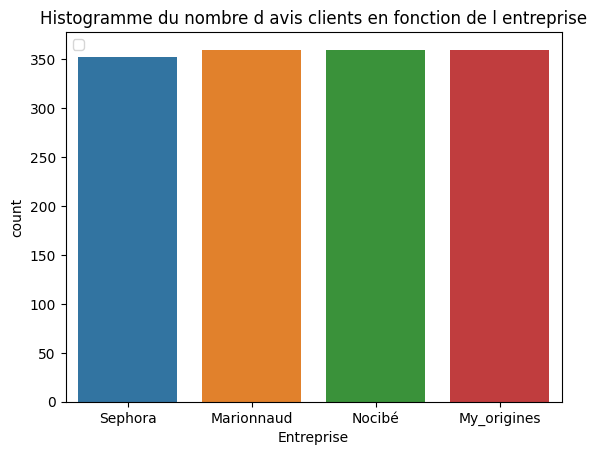

In [56]:
# Analyse de la distribution du nombre d'avis par entreprises

sns.countplot(x="company", data=df);
plt.xlabel('Entreprise')
plt.legend()
plt.title('Histogramme du nombre d avis clients en fonction de l entreprise');

# dans un 1er temps, ayant scrappé le même nombre de page (contenant le même nombre de commentaires), nous avons autant
# de données pour toutes les entreprises - nous n'avons pas nécessité de normaliser nos données

In [53]:
# autre méthodes avec un value_counts

df['company'].value_counts()


company
Marionnaud     360
Nocibé         360
My_origines    360
Sephora        352
Name: count, dtype: int64

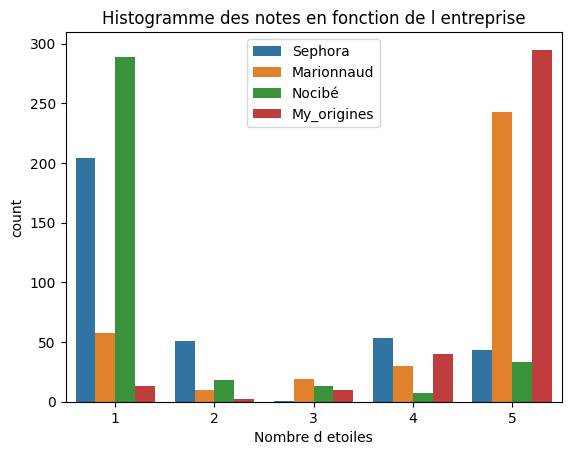

In [66]:
# Analyse de la distribution du nombre d'étoiles par entreprises

sns.countplot(x="notes", hue='company', data=df)
plt.xlabel('Nombre d etoiles')
plt.legend()
plt.title('Histogramme des notes en fonction de l entreprise');

# ce graphique nous permet de voir
# de façon générale que les clients sont extrêmes dans leurs notations et mettent soit une très bonne note (5) soit une très mauvaise (1)
# mais il n'y a pas d'entre deux
# Sephora et Nocibé sont est assez mal nôtés, contrairement à My Origins et Marionnaud qui ont de très bonnes notes
# Il serait donc intéressent de savoir ce qui différencie ces entreprises.

In [61]:
print("Le pourcentage de répartition des étoiles est de : ", df["notes"].value_counts(normalize = True)*100)

Le pourcentage de répartition des étoiles est de :  notes
5    42.877095
1    39.385475
4     9.078212
2     5.656425
3     3.002793
Name: proportion, dtype: float64


In [62]:
# Visualisation des 20 clients déposant le plus de commentaires 

top_20 = df.nlargest(20, 'nb_avis_client')
print(top_20[['company', 'client', 'nb_avis_client', 'notes']])

# on remarque qu'une cliente (Marlène Santin) est particulièrement active sur Trustpilot
# la colonne 'nb_avis_client' ne semble cependant pas pertinente. 
# en effet, si une cliente faite de nombreux achats sur un meme site et note chacune de ses commandes, 
# le nb_avis_client est calculé sur l'ensemble du site Trustpilot et non pour l'entreprise visé (ex: Nocibé dans le cas de Marlène)
# nous ne poursuivrons donc pas l'analyse de cette variable

         company                   client  nb_avis_client  notes
256       Nocibé           Marlène Santin             285      5
261       Nocibé                     Salb              79      1
40   My_origines                Sylvie F.              53      5
30       Sephora                boubouche              52      5
99    Marionnaud                 Brynie92              51      3
251  My_origines                  Chantal              46      5
307       Nocibé            Patriick Sala              45      1
50        Nocibé                   mikael              40      2
266       Nocibé                 isabelle              39      1
218       Nocibé               Foxie-Titi              38      1
139  My_origines                 Customer              38      5
23       Sephora                     Eric              35      5
214       Nocibé                  Lya Lya              34      3
203  My_origines           Philippe Thebe              34      5
34        Nocibé  Magali 

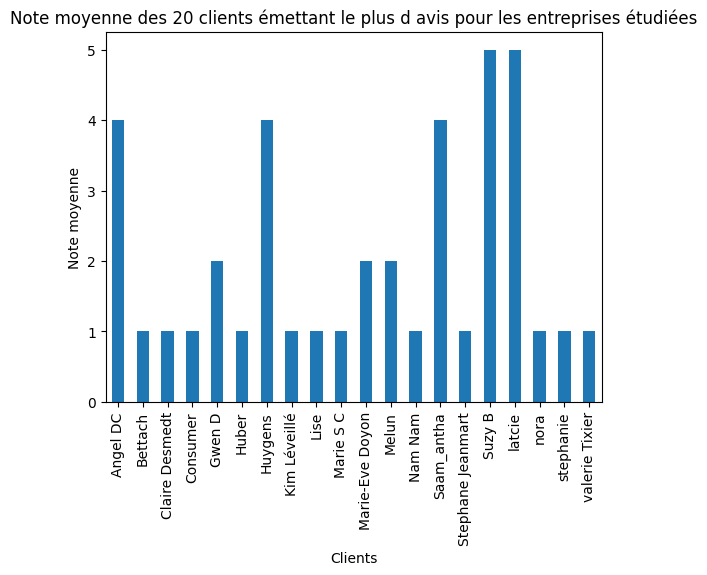

In [64]:
top_clients = df['client'].value_counts().nlargest(20)
top_clients_df = df[df['client'].isin(top_clients.index)]

moyenne_notes_top_clients = top_clients_df.groupby('client')['notes'].mean()

moyenne_notes_top_clients.plot(kind='bar')

plt.xlabel('Clients')
plt.ylabel('Note moyenne')
plt.title('Note moyenne des 20 clients émettant le plus d avis pour les entreprises étudiées')

plt.show()


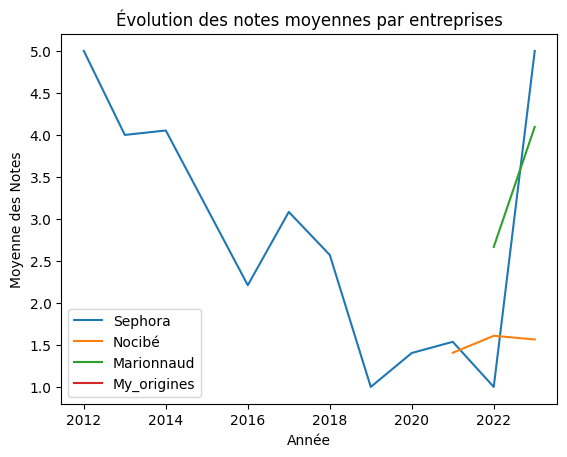

In [68]:
# évolution de la moyenne d'étoiles par an

moyennes = df.groupby(["annee_commande", "company"])["notes"].mean().reset_index()
entreprises = moyennes['company'].unique()


fig, ax = plt.subplots()

for entreprise in entreprises:
    data = moyennes[moyennes['company'] == entreprise]
    ax.plot(data['annee_commande'], data['notes'], label=entreprise)

ax.legend()

ax.set_xlabel('Année')
ax.set_ylabel('Moyenne des Notes')
ax.set_title("Évolution des notes moyennes par entreprises");


annee_commande
2012                          NaT
2013                          NaT
2014                          NaT
2016                          NaT
2017                          NaT
2018                          NaT
2019                          NaT
2020                          NaT
2021                          NaT
2022   16 days 09:53:41.720776595
2023    7 days 09:42:36.110294117
Name: delai_reponse, dtype: timedelta64[ns]


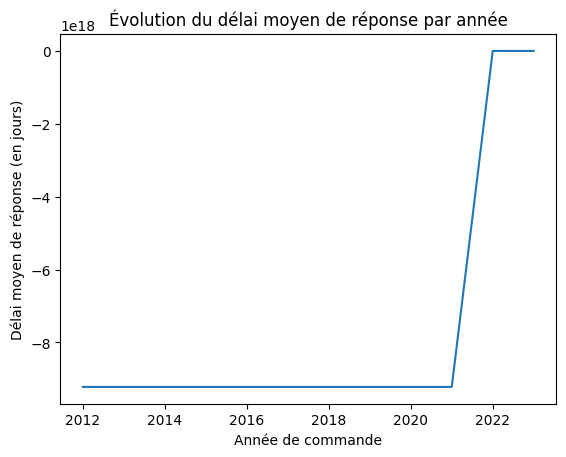

In [69]:
# On calcule l'évolution du délai moyen de réponse du sav 

df['delai_reponse'] = pd.to_timedelta(df['delai_reponse']) 

# on convertit la variable delai_reponse en timedelta qui représente le format d'un délai

moyenne_delai_par_annee = df.groupby('annee_commande')['delai_reponse'].mean()
print(moyenne_delai_par_annee)

plt.plot(moyenne_delai_par_annee.index, moyenne_delai_par_annee.values)
plt.xlabel('Année de commande')
plt.ylabel('Délai moyen de réponse (en jours)')
plt.title('Évolution du délai moyen de réponse par année')
plt.show() 

### 2.3 Text mining

Nous allons maintenant essayer de déterminer le sentiment général qui se dégage des commentaires. 

In [64]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [57]:
# Initialiser la variable des mots vides
stop_words = set(stopwords.words('french'))
print(stop_words)

{'eus', 'ne', 'étées', 'étante', 'fusses', 'tes', 'ses', 'eussent', 'êtes', 'mais', 'votre', 'fusse', 'm', 'eues', 'la', 'il', 'eusse', 'étés', 'un', 'aviez', 'toi', 'se', 'au', 'aux', 'nous', 'à', 'aurait', 'soient', 'dans', 'été', 'ait', 'c', 'eue', 'eurent', 'sont', 'suis', 'étantes', 'moi', 'auriez', 'serait', 'te', 'même', 'que', 'ayante', 'qu', 'ont', 'les', 'étais', 'auront', 'de', 'avec', 'ou', 'aie', 'tu', 'ayant', 'leur', 'par', 'en', 'et', 'me', 'serions', 'avez', 'eusses', 'fussiez', 'notre', 'ta', 'n', 'serais', 'étant', 'seraient', 'avaient', 's', 'eût', 'avait', 'seriez', 'fus', 'aura', 'ton', 'aurions', 'le', 'aies', 'vos', 'seras', 't', 'avais', 'étants', 'eu', 'ai', 'eut', 'nos', 'sera', 'serai', 'l', 'ces', 'aurais', 'es', 'sois', 'sur', 'serez', 'avons', 'des', 'y', 'lui', 'ma', 'auras', 'une', 'furent', 'aurons', 'fussent', 'seront', 'aurai', 'aurez', 'du', 'soyons', 'vous', 'pas', 'étiez', 'soyez', 'mon', 'ayants', 'elle', 'ayons', 'eûtes', 'auraient', 'soit', 'fû

In [109]:
# Mettre à jour la valeur de stop_words avec le nom des différentes boutiques
mots_vides = ["Uniqlo", "uniqlo", "Vinted", "vinted", "Spartoo", "spartoo" "La Boutique Officielle"]
stop_words.update(mots_vides)

In [78]:
#Importer les packages nécessaires
from PIL import Image
import numpy as np

#Définir la fonction permettant d'appliquer un masque de couleur selon les sentiments positifs ou négatifs
def plot_word_cloud(text, background_color = "black") :

    # Définir le calque du nuage des mots
    wc = WordCloud(background_color=background_color, max_words=200, stopwords=stop_words, max_font_size=50, random_state=42)

    # Générer et afficher le nuage de mots
    plt.figure(figsize= (10,10))
    wc.generate(text)
    plt.imshow(wc)
    plt.show()


In [69]:
# Séparer df en données positives et négatives
df_vetements_pos = df_vetements[df_vetements.notes == 5]
df_vetements_neg = df_vetements[df_vetements.notes == 1]

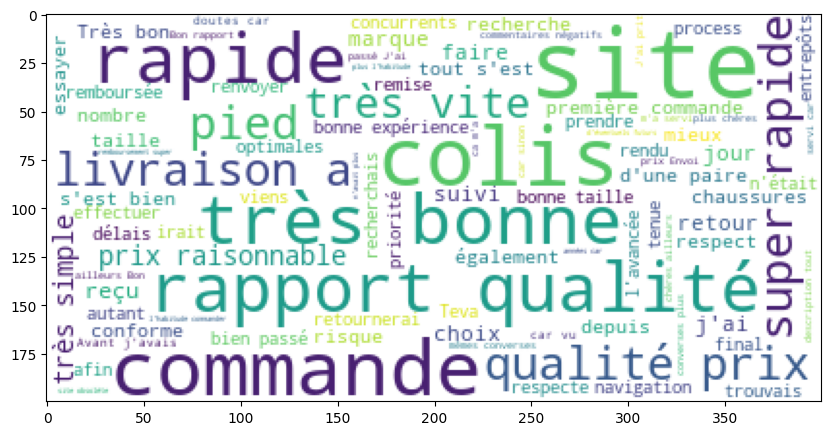

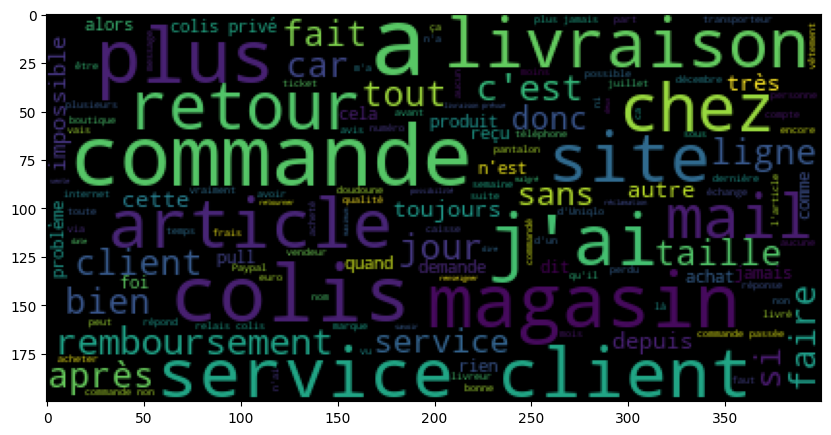

In [79]:
# Transformer les commentaires du df_vetements en chaine de caractère de type string
text_pos = ""
for e in df_vetements_pos.commentaire : text_pos += e
text_neg = ""
for e in df_vetements_neg.commentaire : text_neg += e

# Tracer le nuage de mots
plot_word_cloud(text_pos, "white")
plot_word_cloud(text_neg, "black")


In [113]:
mots_vides2 = ["de", "le", "et", "pas", "je", "en", "la", "a", "(", ")", "à", "que", "un", "pour", "ne", "les", "une", "sur", "j'ai", "très", "plus", ".", ",", "!", "'", ":", "...", "`"]
stop_words.update(mots_vides2)

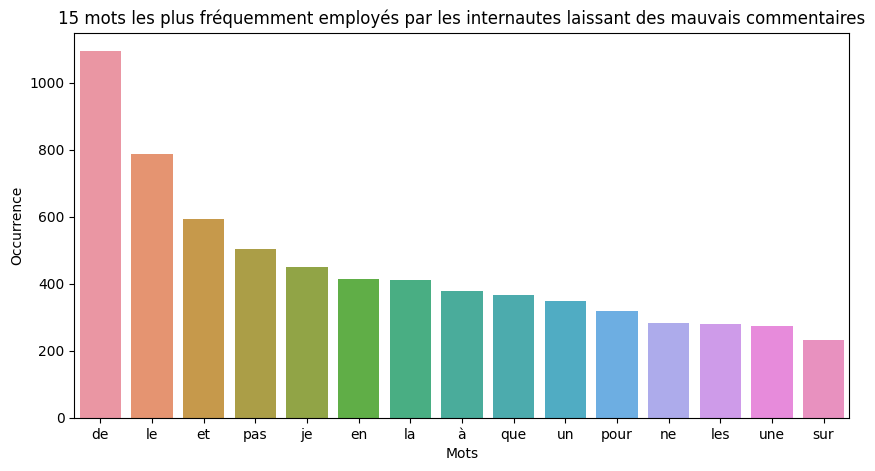

In [116]:
from collections import Counter
import seaborn as sns 

chaine = ' '.join(i.lower() for i in df_vetements_neg.commentaire if i.lower() not in stop_words)
dico = Counter(chaine.split())

mots = [m[0] for m in dico.most_common(15)]
freq = [m[1] for m in dico.most_common(15)]

plt.figure(figsize= (10,5))
sns.barplot(x=mots, y=freq)
plt.title('15 mots les plus fréquemment employés par les internautes laissant des mauvais commentaires') 
plt.xlabel('Mots')
plt.ylabel('Occurrence')
plt.show()

# inutile en l'état mais à creuser


In [114]:
tous_mots = [mot for liste_mots in df_vetements['commentaire'] for mot in liste_mots]

compteur_mots = Counter(mot.lower() for mot in tous_mots if mot not in stop_words)
mots_plus_freq = compteur_mots.most_common(10)

df_resultats = pd.DataFrame(mots_plus_freq, columns=['Mot', 'Occurrence'])

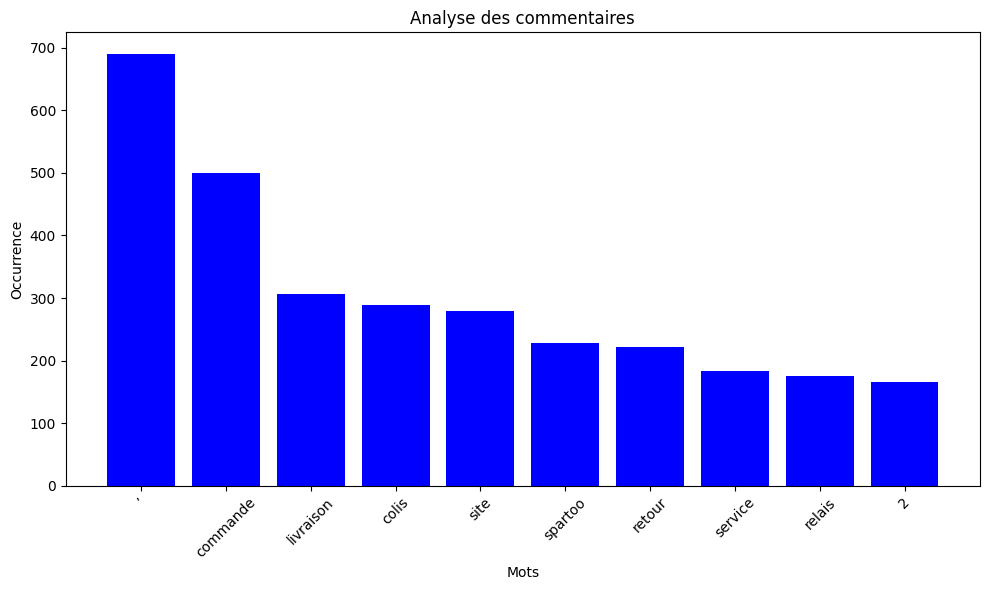

In [115]:
# On visualise les mots les plus fréquents dans les commentaires

plt.figure(figsize=(10, 6))
plt.bar(df_resultats['Mot'], df_resultats['Occurrence'], color='blue')
plt.xlabel('Mots')
plt.ylabel('Occurrence')
plt.title('Analyse des commentaires')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#pas forcément utile car ne donne pas d'infos sur ce qui ne vas pas ... 

## 3. Modélisation et définition d'algorithmes 

## 4. Conclusion de la performance des modèles